In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv', sep = ';')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [53]:
df['Geography_num'] = df['Geography']

df['Geography_num'].replace('France', 0, inplace=True)
df['Geography_num'].replace('Spain', 1, inplace=True)
df['Geography_num'].replace('Germany', 2, inplace=True)

## EDA

In [54]:
features_eda = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary', 'Geography_num']

In [55]:
corr = df[features_eda].corr()
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_num
CreditScore,1.000000,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,0.008267
Gender,0.002857,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.016936
Age,-0.003965,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.048092
Tenure,0.000842,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,0.001418
Balance,0.006268,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.348700
NumOfProducts,0.012238,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.006180
HasCrCard,-0.005458,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.004036
IsActiveMember,0.025651,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.012692
EstimatedSalary,-0.001384,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.007382
Geography_num,0.008267,0.016936,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382,1.000000


<AxesSubplot:>

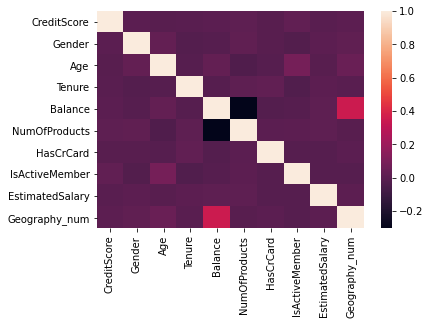

In [56]:
sns.heatmap(corr)

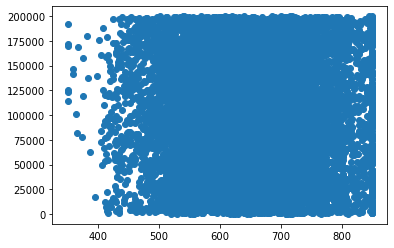

In [51]:
plt.scatter(df['CreditScore'], df['EstimatedSalary'])

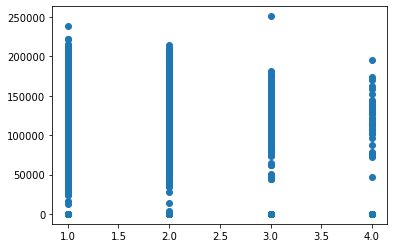

In [52]:
plt.scatter(df['NumOfProducts'], df['Balance'])

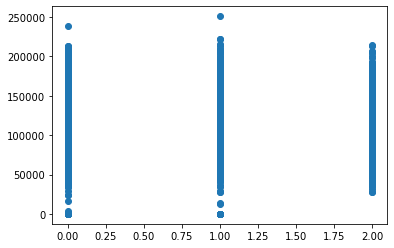

In [57]:
plt.scatter(df['Geography_num'], df['Balance'])

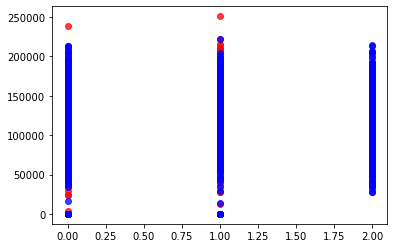

In [58]:
plt.scatter(df['Geography_num'][df['Exited'] == 1],
            df['Balance'][df['Exited'] == 1],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(df['Geography_num'][df['Exited'] == 0],
            df['Balance'][df['Exited'] == 0],
            alpha=0.75,
            color='blue',
            label='-')

[Text(1, 0, 'EstimatedSalary'), Text(2, 0, 'Balance')]

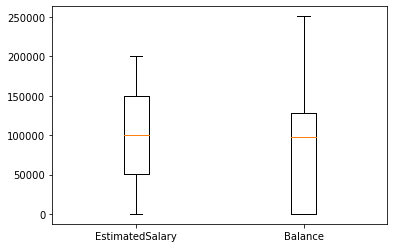

In [60]:
my_dict = {'EstimatedSalary': df['EstimatedSalary'], 'Balance': df['Balance']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

<AxesSubplot:ylabel='Age'>

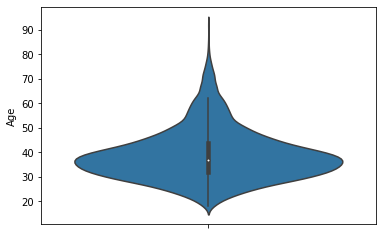

In [62]:
sns.violinplot(y=df["Age"])

<AxesSubplot:xlabel='NumOfProducts', ylabel='Balance'>

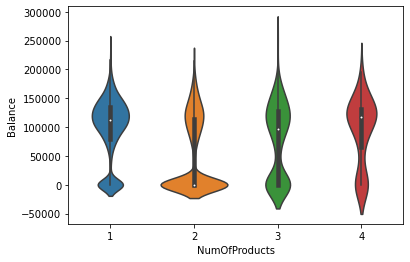

In [63]:
sns.violinplot(x="NumOfProducts", y="Balance", data=df)

## preproccessing

In [7]:
df['Gender'].replace('Male', 0, inplace=True)
df['Gender'].replace('Female', 1, inplace=True)

In [10]:
geography_cols = pd.get_dummies(df["Geography"])
geography_cols

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 1.1+ MB


In [12]:
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']

In [15]:
X = pd.concat([df[features_names], geography_cols], axis = 1)
X.shape

(10000, 12)

In [16]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [17]:
y = df['Exited']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 12) (2000, 12) (8000,) (2000,)


In [20]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

Wall time: 599 ms


KNeighborsClassifier()

In [21]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.182625 0.239


In [44]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, r2_score, plot_roc_curve

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  1.0
test accuracy:  0.858


In [25]:
%time
from sklearn.model_selection import GridSearchCV

n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

Wall time: 0 ns


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 10, 15]})

In [26]:
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.20875 10


In [27]:
%time
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

Wall time: 0 ns
train accuracy:  0.799375
test accuracy:  0.795


In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=22)
rfc.fit(X_train, y_train)

y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  1.0
test accuracy:  0.858


In [43]:
print('test precision_score: ', precision_score(y_test, y_test_predict))
print('test recall_score: ', recall_score(y_test, y_test_predict))
print('test f1_score: ', f1_score(y_test, y_test_predict))
print('test r2_score: ', r2_score(y_test, y_test_predict))
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))

test precision_score:  0.7718446601941747
test recall_score:  0.4015151515151515
test f1_score:  0.5282392026578072
test r2_score:  0.105770926219804
test mean_squared_error:  0.142
test mean_absolute_error:  0.142


In [36]:
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[1557,   47],
       [ 237,  159]], dtype=int64)

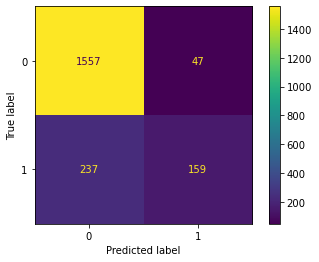

In [38]:
plot_confusion_matrix(rfc, X_test, y_test)

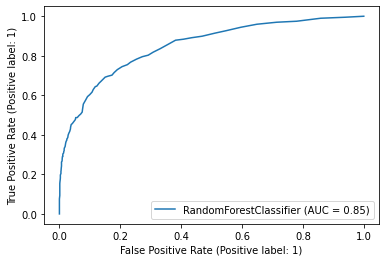

In [45]:
plot_roc_curve(rfc, X_test, y_test)

In [33]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, X.columns[idx], importances[idx]))

Feature importances:
 1. feature 'Age  ' (0.2439)
 2. feature 'EstimatedSalary' (0.1438)
 3. feature 'Balance' (0.1426)
 4. feature 'CreditScore' (0.1418)
 5. feature 'NumOfProducts' (0.1254)
 6. feature 'Tenure' (0.0815)
 7. feature 'IsActiveMember' (0.0435)
 8. feature 'Germany' (0.0212)
 9. feature 'HasCrCard' (0.0191)
10. feature 'Gender' (0.0188)
11. feature 'France' (0.0095)
12. feature 'Spain' (0.0089)
